In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import src.data.process_matlab as pmat
import src.data.make_dataset as mkds

In [4]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

In [5]:
idx = pd.IndexSlice

In [6]:
path = Path('../data/raw/02_07_2019_21_10_00_000.mat')
path.exists()

True

In [7]:
%timeit pmat.matlab_to_pandas(path)

85.7 ms ± 648 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
df = pmat.matlab_to_pandas(path)

In [16]:
df.tail()

,Air_Temp_38m,DeltaT_122_87m,DeltaT_87_38m,DeltaT_38_3m,PRECIP_INTEN,Cup_WS_C1_130m,Cup_WS_122m,Cup_WS_C1_105m,Cup_WS_87m,Cup_WS_C1_80m,Cup_WS_C1_55m,Cup_WS_38m,Cup_WS_C1_30m,Cup_WS_10m,Cup_WS_3m,time_UTC,Sonic_CupEqHorizSpeed_119m,Sonic_direction_119m,Sonic_z_clean_119m,Sonic_CupEqHorizSpeed_100m,Sonic_direction_100m,Sonic_z_clean_100m,Sonic_CupEqHorizSpeed_74m,Sonic_direction_74m,Sonic_z_clean_74m,Sonic_CupEqHorizSpeed_61m,Sonic_direction_61m,Sonic_z_clean_61m,Sonic_CupEqHorizSpeed_41m,Sonic_direction_41m,Sonic_z_clean_41m,Sonic_CupEqHorizSpeed_15m,Sonic_direction_15m,Sonic_z_clean_15m
11995,-8.357145,-0.262086,0.358261,-0.720819,2.971611,6.477105,4.731511,6.75085,0,7.500677,8.376525,0,0.0,5.021862,4.55723,737463.888886,10.580496,289.447994,-0.440000,9.009073,284.564935,-0.930000,12.262178,283.287496,NaN,11.504130,280.840021,-1.08000,10.312371,289.920135,-1.440000,8.045104,271.290163,-1.000000
11996,-8.357145,-0.262086,0.358261,-0.720819,2.971611,6.477105,4.731511,6.75085,0,7.500677,8.376525,0,0.0,5.021862,4.55723,737463.888887,10.579395,288.566425,-0.730000,9.443098,285.606672,-0.620000,11.768726,284.195031,NaN,11.628710,280.217747,-1.29000,10.373659,290.696549,-1.800000,7.840625,270.303948,-0.850000
11997,-8.357145,-0.262086,0.358261,-0.720819,2.971611,6.477105,4.731511,6.75085,0,7.500677,8.376525,0,0.0,5.021862,4.55723,737463.888887,10.876856,287.098599,-0.770000,9.652590,286.759701,-0.460000,11.355549,285.437934,NaN,11.642998,280.707585,-1.21000,10.289028,290.631488,-1.990000,8.135582,271.932014,-0.940000
11998,-8.357145,-0.262086,0.358261,-0.720819,2.971611,6.477105,4.731511,6.75085,0,7.500677,8.376525,0,0.0,5.021862,4.55723,737463.888888,10.330479,283.666443,-0.108067,9.854263,287.108649,-0.174548,11.169575,286.391261,NaN,11.530850,278.695665,-0.14629,9.970181,290.335579,-0.278755,8.135582,271.932014,-0.101552
11999,-8.357145,-0.262086,0.358261,-0.720819,2.971611,6.477105,4.731511,6.75085,0,7.500677,8.376525,0,0.0,5.021862,4.55723,737463.888888,10.251951,285.679586,-0.108067,9.982329,287.339654,-0.174548,10.927767,286.419285,NaN,11.357046,280.018399,-0.14629,10.145092,289.254553,-0.278755,8.189121,273.166634,-0.101552


In [38]:
%timeit pmat.sonic_summary(df, 119)

6.87 ms ± 30.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%timeit mkds.summarize_file(path)

162 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [14]:
%lprun -f mkds.summarize_file mkds.summarize_file(path)

Timer unit: 1e-06 s

Total time: 0.309794 s
File: /mnt/c/code/wind/turbulence_spectra/src/data/make_dataset.py
Function: summarize_file at line 22

Line #      Hits         Time  Per Hit   % Time  Line Contents
    22                                           def summarize_file(filepath: Path,) -> Dict[str, pd.DataFrame]:
    23         3        516.0    172.0      0.2      timestamp = pd.to_datetime(
    24         1          6.0      6.0      0.0          filepath.name[:16], format="%m_%d_%Y_%H_%M"
    25         1         29.0     29.0      0.0      ) - pd.Timedelta(-7, unit="h")
    26         1     124315.0 124315.0     40.1      matlab_df = pmat.matlab_to_pandas(filepath)
    27         1          1.0      1.0      0.0      sonics = []
    28         1          1.0      1.0      0.0      cups = []
    29                                           
    30         7         14.0      2.0      0.0      for height in SONIC_HEIGHTS:
    31         6      95221.0  15870.2     30.7      

In [15]:
%lprun -f pmat.matlab_to_pandas pmat.matlab_to_pandas(path)

Timer unit: 1e-06 s

Total time: 0.120829 s
File: /mnt/c/code/wind/turbulence_spectra/src/data/process_matlab.py
Function: matlab_to_pandas at line 49

Line #      Hits         Time  Per Hit   % Time  Line Contents
    49                                           def matlab_to_pandas(
    50                                               filepath: Path, timestamps=False, col_subset: Optional[Sequence] = SONIC_SUBSET
    51                                           ) -> pd.DataFrame:
    52         1          2.0      2.0      0.0      exclusions = {
    53         1          2.0      2.0      0.0          "__header__",
    54         1          2.0      2.0      0.0          "__version__",
    55         1          1.0      1.0      0.0          "__globals__",
    56         1          1.0      1.0      0.0          "tower",
    57         1          1.0      1.0      0.0          "datastream",
    58                                               }
    59         1      91608.0  91608.0

In [4]:
out_dir = Path("../data/processed/")

In [5]:
dfs = {f.name.split('.')[0] : pd.read_parquet(f) for f in out_dir.glob('*.parquet')}

In [6]:
for key, val in dfs.items():
    if key != 'misc':
        dfs[key] = val.set_index(['height', 'timestamp'])
    else:
        dfs[key] = val.set_index('timestamp')

In [7]:
cups = dfs['cups']
sonic = dfs['sonics']
misc = dfs['misc']

In [8]:
del dfs

In [9]:
(cups['mean_square'] - cups['mean'].pow(2) - cups['cum_square_sd_2s']).describe() # within machine epsilon

count    1.152000e+04
mean    -1.626303e-20
std      2.892008e-18
min     -2.220446e-16
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.110223e-16
dtype: float64

In [16]:
sonic.head(3)

,,nan_count,mean,mean_square,mean_cube,cum_square_sd_60s,cum_square_sd_30s,cum_square_sd_10s,cum_square_sd_2s,cum_cube_sd_60s,cum_cube_sd_30s,cum_cube_sd_10s,cum_cube_sd_2s,vert_nan_count,vert_mean,vert_mean_square,vert_mean_cube,vert_cum_square_sd_60s,vert_cum_square_sd_30s,vert_cum_square_sd_10s,vert_cum_square_sd_2s,dir_mean,waked_frac
height,timestamp,,,,,,,,,,,,,,,,,,,,,,
119,2019-01-01 07:00:00,0,7.741269,60.205811,470.357392,0.175183,0.221417,0.249468,0.270029,6.103863,6.372773,6.425373,6.442913,0,-0.116775,0.103902,-0.007359,0.018279,0.034086,0.060655,0.080494,22.387435,0.000000
100,2019-01-01 07:00:00,0,7.341598,54.241822,403.232981,0.201968,0.244722,0.283268,0.317134,7.209708,7.391268,7.486115,7.521468,0,-0.097509,0.131799,-0.003917,0.030250,0.048135,0.076271,0.106412,21.422592,0.000000
74,2019-01-01 07:00:00,0,8.192143,67.790835,567.794367,0.110592,0.148192,0.199392,0.259123,17.346110,17.529959,17.662099,17.746398,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.499131,0.000083


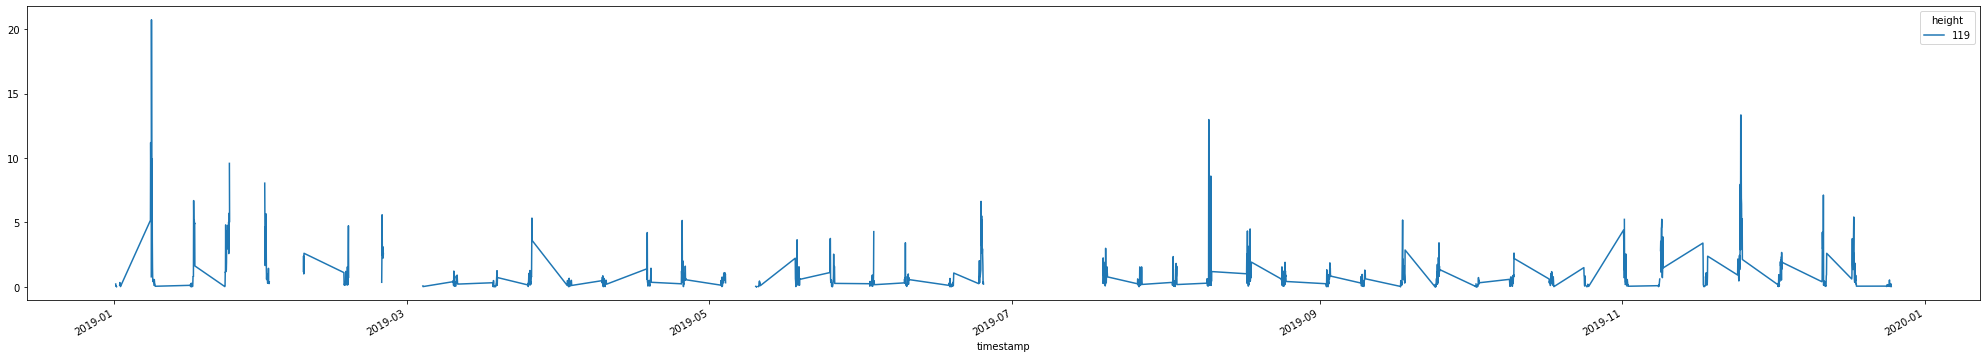

In [17]:
sonic.loc[idx[119, :], 'cum_square_sd_30s'].unstack(level='height').plot(figsize=(35,6))

In [18]:
sonic['cum_square_sd_30s'].groupby(level='height').describe()

,count,mean,std,min,25%,50%,75%,max
height,,,,,,,,
15,1092.0,0.819910,1.272733,0.004926,0.147706,0.369802,0.933494,16.446416
41,987.0,1.151070,1.950619,0.009514,0.182526,0.442197,1.200641,21.500179
61,936.0,0.984192,1.752089,0.002030,0.123716,0.334769,1.026353,19.281692
74,1113.0,1.104550,2.028809,0.003605,0.139048,0.369968,1.016988,22.000135
100,1046.0,0.925045,1.613953,0.005561,0.131475,0.370453,0.937198,21.640286
119,994.0,0.981719,1.717465,0.001466,0.139902,0.401384,0.995764,20.720020


In [22]:
(sonic['vert_nan_count'] / 12000).groupby(level='height').describe()

,count,mean,std,min,25%,50%,75%,max
height,,,,,,,,
15,1152.0,0.044271,0.205786,0.0,0.0,0.0,0.0,1.0
41,1152.0,0.189236,0.391866,0.0,0.0,0.0,0.0,1.0
61,1152.0,0.183160,0.386965,0.0,0.0,0.0,0.0,1.0
74,1152.0,0.075521,0.264345,0.0,0.0,0.0,0.0,1.0
100,1152.0,0.074653,0.262944,0.0,0.0,0.0,0.0,1.0
119,1152.0,0.125000,0.330863,0.0,0.0,0.0,0.0,1.0


In [23]:
(sonic['nan_count'] / 12000).groupby(level='height').describe()

,count,mean,std,min,25%,50%,75%,max
height,,,,,,,,
15,1152.0,0.024180,0.142982,0.0,0.0,0.0,0.0,1.0
41,1152.0,0.132783,0.337495,0.0,0.0,0.0,0.0,1.0
61,1152.0,0.179608,0.383229,0.0,0.0,0.0,0.0,1.0
74,1152.0,0.027606,0.160961,0.0,0.0,0.0,0.0,1.0
100,1152.0,0.050775,0.214837,0.0,0.0,0.0,0.0,1.0
119,1152.0,0.098095,0.293255,0.0,0.0,0.0,0.0,1.0


In [11]:
cup_heights = cups.index.get_level_values('height').unique()
cup_heights

Int64Index([130, 122, 105, 87, 80, 55, 38, 30, 10, 3], dtype='int64', name='height')

In [12]:
cups['cum_square_sd_30s'].groupby(level='height').describe()

,count,mean,std,min,25%,50%,75%,max
height,,,,,,,,
3,1152.0,1052.532947,13728.363412,0.000000,0.132585,0.318782,0.716898,378074.873243
10,1152.0,0.724329,1.120537,0.000000,0.126509,0.327404,0.826555,14.903437
30,1152.0,0.871014,1.516501,0.000000,0.116398,0.333395,0.903044,18.631020
38,1152.0,0.840226,1.485291,0.000000,0.114850,0.321378,0.846898,19.795427
55,1152.0,0.906178,1.675111,0.000000,0.110018,0.316348,0.886302,21.223685
80,1152.0,0.930353,1.723256,0.000000,0.103734,0.320841,0.907351,20.991613
87,1152.0,0.879025,1.607009,0.000000,0.109980,0.322059,0.867775,20.799498
105,1152.0,0.943249,1.745863,0.002546,0.118165,0.348672,0.900236,22.229065
122,1152.0,0.925682,1.631761,0.000000,0.122559,0.401024,0.931462,22.165619


In [25]:
sonic.query('(height == 119) & (nan_count == 12000)').isna().all(axis=0)

nan_count                 False
mean                       True
mean_square                True
mean_cube                  True
cum_square_sd_60s          True
cum_square_sd_30s          True
cum_square_sd_10s          True
cum_square_sd_2s           True
cum_cube_sd_60s            True
cum_cube_sd_30s            True
cum_cube_sd_10s            True
cum_cube_sd_2s             True
vert_nan_count            False
vert_mean                  True
vert_mean_square           True
vert_mean_cube             True
vert_cum_square_sd_60s     True
vert_cum_square_sd_30s     True
vert_cum_square_sd_10s     True
vert_cum_square_sd_2s      True
dir_mean                   True
waked_frac                False
dtype: bool